<a href="https://colab.research.google.com/github/vamsi1961/Opencv/blob/main/FINAL_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING NECCESSARY LIBRARIES**

---



In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

**LOADING THE IMAGE**

---



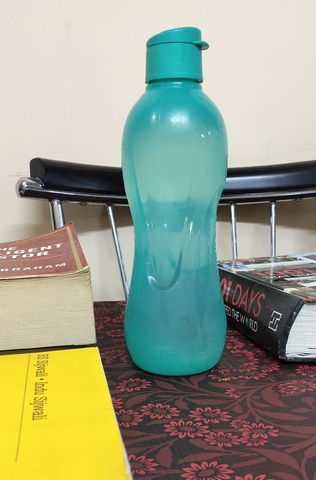

In [8]:
image = cv2.imread("bottle.jpg",cv2.IMREAD_COLOR)
cv2_imshow(image)

In [9]:
image.shape

(480, 316, 3)

**CHANGING THE IMAGE TO GRAYSCALE**

---



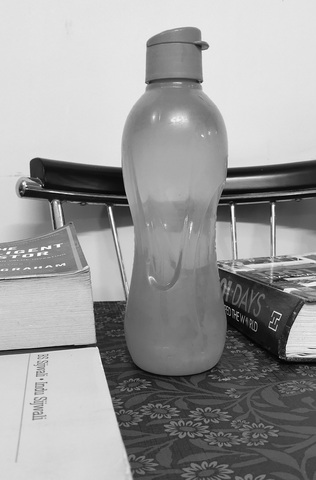

In [26]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

**THRESHOLDING USING OTSU'S BINARIZATION METHOD**

---





threshold_value 148.0


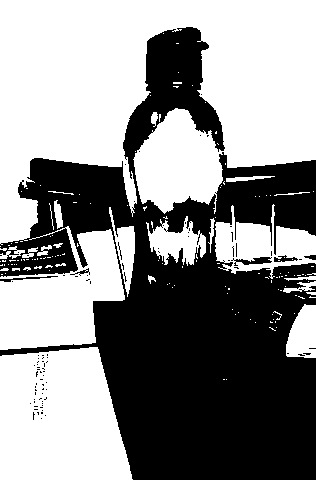

In [28]:
threshold_value, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print("threshold_value",threshold_value) 
cv2_imshow(binary)

**SMOOTHING THE IMAGE**

---



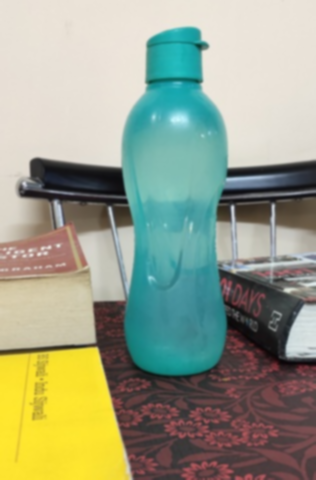

In [10]:
gaussian_blur = cv2.GaussianBlur(image,(5,5),0)
cv2_imshow(gaussian_blur)

**CHANGING THE COLOR-SPACE OF THE IMAGE TO Lab**

---



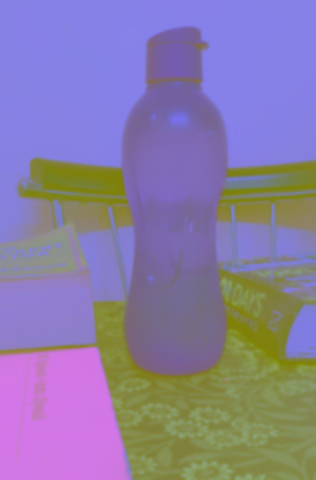

In [11]:
lab = cv2.cvtColor(gaussian_blur,cv2.COLOR_BGR2Lab)
cv2_imshow(lab)

**SETTING THE UPPER AND LOWER COOR LIMITS FOR THE BOTTLE COLOR (BLUE)**

---



In [12]:
""" Lower color limit """
l_low = 0
a_low = 0
b_low = 0

""" Upper Color Limit """
l_up  = 255
a_up  = 117
b_up  = 255

lower = [l_low,a_low,b_low]
upper = [l_up,a_up,b_up]

lower=np.array(lower,dtype=np.uint8)
upper=np.array(upper,dtype=np.uint8)

print(lower)
print(upper)

[0 0 0]
[255 117 255]


**USING THE INRANGE() FUNCTION**

---



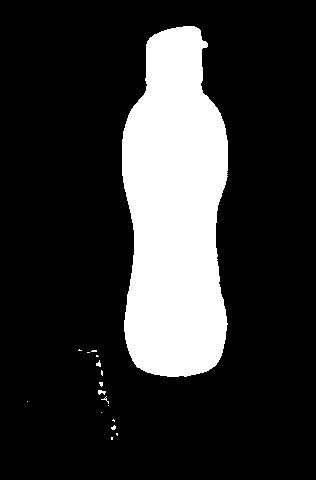

In [13]:
bottle_rough = cv2.inRange(lab,lower,upper)
cv2_imshow(bottle_rough)

**FINDING THE CONTOURS**

---



In [14]:
contours, hierarchy = cv2.findContours(bottle_rough,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
len(contours)

18

**OBTAINING THE CONTOUR WITH MAXIMUM CONTOUR**

---



In [15]:
bottle_contour = max(contours,key= cv2.contourArea)

**DRAWING THE CONTOUR AROUND THE BOTTLE**

---



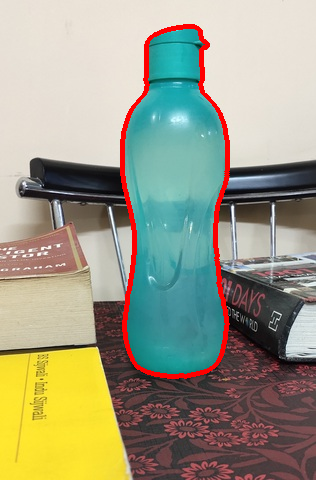

In [16]:
image1 = image.copy()
cv2.drawContours(image1,[bottle_contour],0,(0,0,255),3)
cv2_imshow(image1)

**CREATING A BLACK MASK**

---



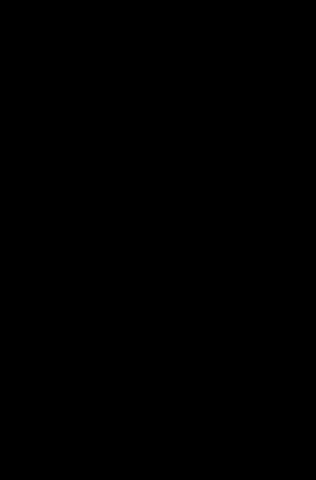

In [17]:
mask = np.zeros(image.shape,dtype=image.dtype)
cv2_imshow(mask)

**CHANGING THE BOTTLE REGION TO WHITE**

---



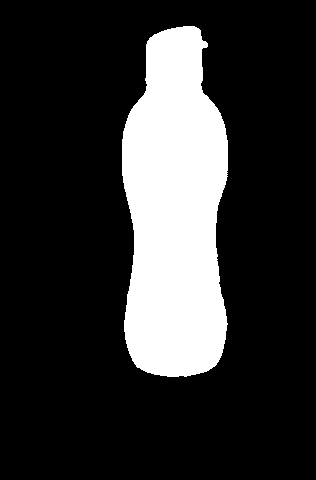

In [18]:
cv2.drawContours(mask,[bottle_contour],0,(255,255,255),-1)
cv2_imshow(mask)

**MASKING THE ORIGINAL PHOTO WITH THE ABOVE MASK**

---



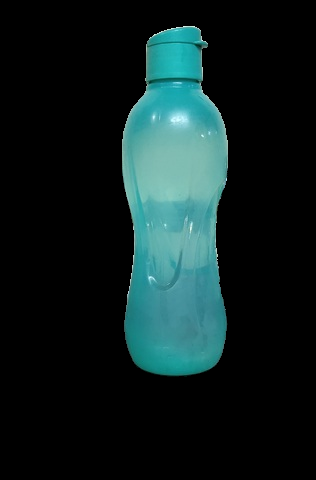

In [19]:
bottle = cv2.bitwise_and(image,mask)
cv2_imshow(bottle)

**CALCULATING THE MOMENTS OF THE BOTTLE CONTOUR**

---



In [20]:
M = cv2.moments(bottle_contour)

In [21]:
Area = M['m00']
int(Area)

29316

In [22]:
m10 = int(M['m10'])
m01 = int(M['m01'])
(m10,m01)

(5116916, 6211103)

**CALCULATING THE CENTROID OF THE BOTTLE**

---



In [23]:
Cx = int(m10/Area)
Cy = int(m01/Area)
(Cx,Cy)

(174, 211)

**DRAWING A CIRCLE AS A POINT**

---



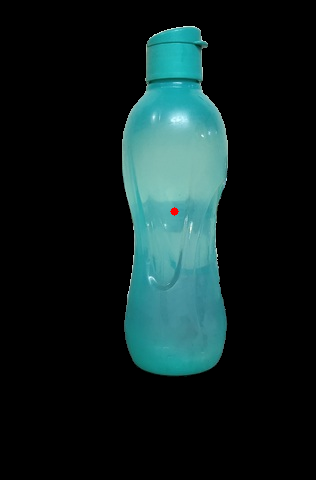

In [24]:
cv2.circle(bottle,(Cx,Cy),4,(0,0,255),-1)
cv2_imshow(bottle)

**WRITING TEXT ON THE IMAGE**

---



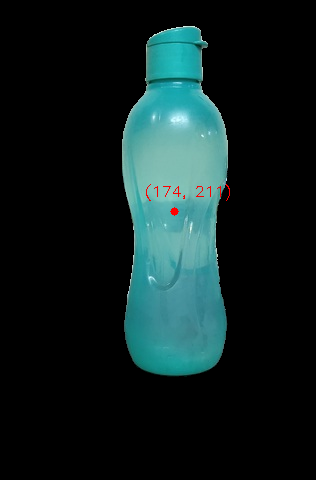

In [25]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(bottle,f'{Cx,Cy}'.format(),(Cx-30,Cy-15), font, 0.5, (0,0,255), 1)
cv2_imshow(bottle)